# <font color="gold"> SynPop-Microcensus Validation

### <font color="silver"> 1) Age Distribution
### <font color="silver"> 2) Gender distribution
### <font color="silver"> 3) Activity (Trips) totals: leisure, work,..
### <font color="silver">  4) Trip Chain distribution (my weird graph): H, H-W-H, H-W-L-H,...
### <font color="silver">  5) O-D distribution by zone
### <font color="silver">  6) Time distribution of activity or trip}

# <font color="green"> Imports

In [33]:
# pip install seaborn

In [1]:
# Import necessary Libraries
import os
import matsim
import pandas as pd
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from collections import defaultdict
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

### <font color="green"> Read CSV files created in the Pre-processing

In [3]:
SynPop_activities = pd.read_csv("./processedCSVs/SynPop_activities.csv")
SynPop_persons = pd.read_csv("./processedCSVs/SynPop_persons.csv")

### <font color="orange"> Task 01: Age Distribution

In [4]:
# Change type of age column of persons dartaframe to integer
SynPop_persons['age'] = SynPop_persons['age'].astype(int)

C:\Users\muaa\AppData\Local\Temp\ipykernel_27268\46031196.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=SynPop_persons, x="age", palette="pastel", edgecolor=".6")


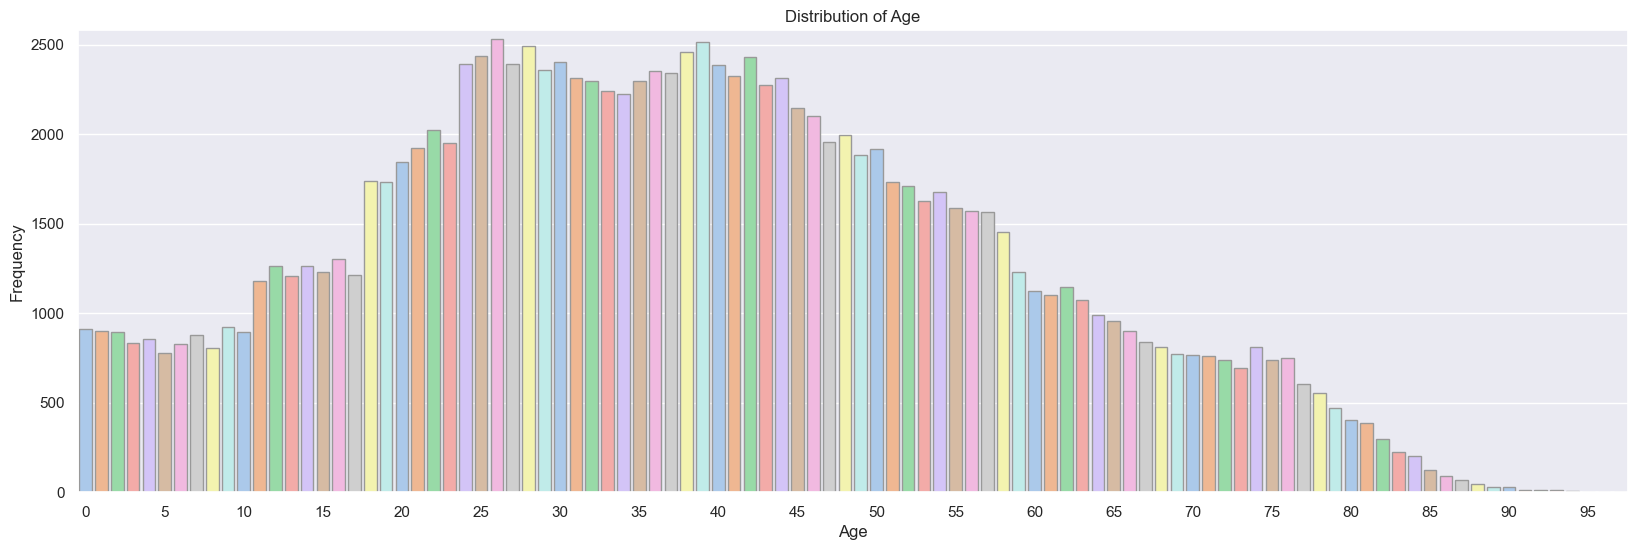

In [5]:
# Plot age distribution of the persons
# set sns style
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))

# Create a countplot for the 'age' column
sns.countplot(data=SynPop_persons, x="age", palette="pastel", edgecolor=".6")

# Add labels and a title to the plot
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")

# Set the x-axis and y-axis 
max_frequency = SynPop_persons['age'].value_counts().iloc[0] + 50
plt.ylim(0, max_frequency) 
xticks_range = range(0, 100, 5)
xtick_labels = range(0, 100, 5)
plt.xticks(xticks_range, xtick_labels)
plt.yticks()

# Show the plot
plt.show()

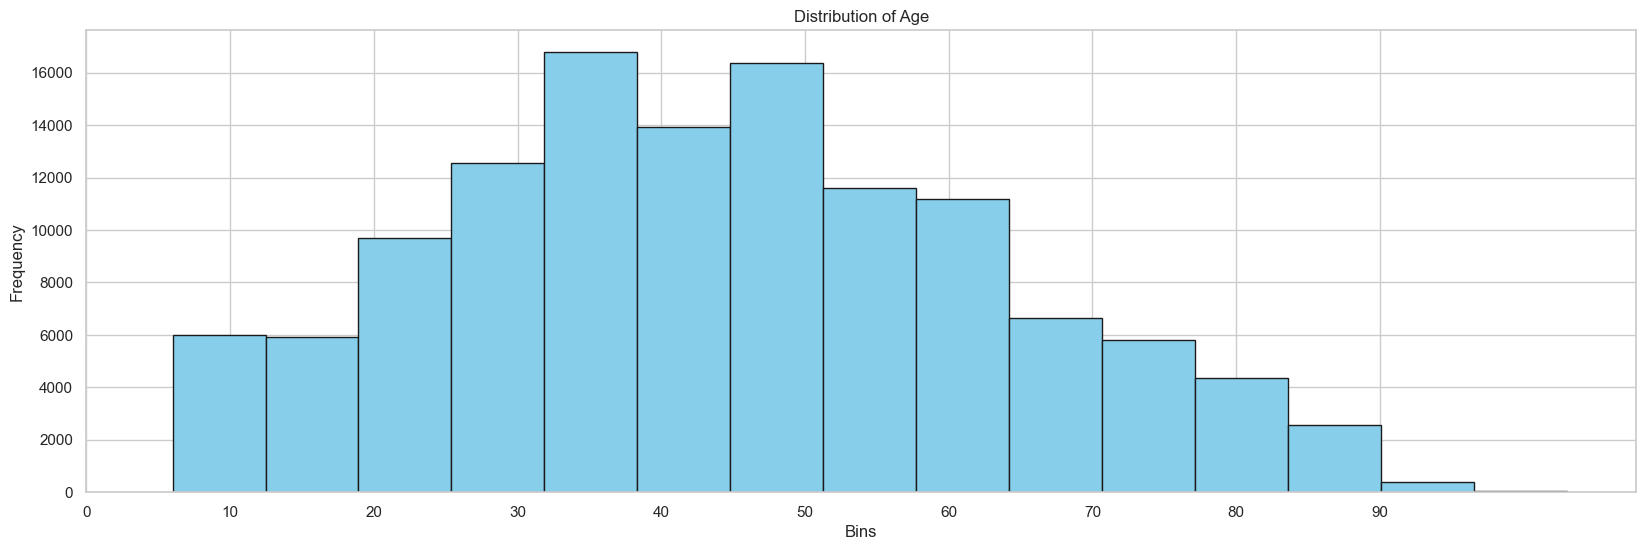

In [ ]:
# Plot histogram of the ages of persons with higher than 6 years old
num_bins = 15

# Set sns style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

# Create a histogram with specified number of bins
plt.hist(plan_df_higher_six['age'], bins=num_bins, color="skyblue", edgecolor="k")


# Add labels and a title to the plot
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
xticks_range = range(0, 100, 10)
plt.xticks(xticks_range)

# Show the plot
plt.show()

### <font color="orange"> Task 2: Sex Distribution </font>

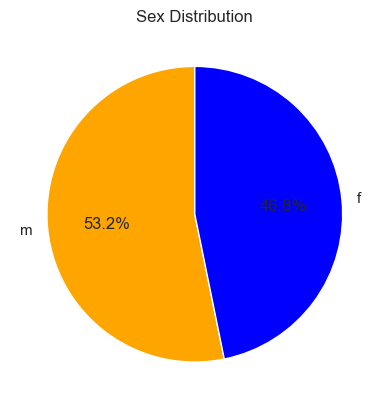

In [9]:
# Sex Distribution of the persons dataframe
labels = gender_counts = SynPop_persons['sex'].value_counts().index
sizes = gender_counts = SynPop_persons['sex'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Set the colors of pie chart
colors = ['orange', 'blue']

# Set the background color of the plot
fig.set_facecolor('white')  

# Create the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Sex Distribution")

# Show the plot
plt.show()

### <font color="orange"> Task 03: Activity Type Distribution <font>

------------ACTIVITIES BEFORE DROPPING PT INTERACTIONS AND PLAN THAT INCLUDE OUTSIDE----------------  
TOTAL 1052661  
pt interaction       385067  
outside              247934  
home                 206399  
work                  77309  
leisure               52304  
shop                  34409  
other                 28114  
education             16500  
freight_loading        2326  
freight_unloading      2299  

C:\Users\muaa\AppData\Local\Temp\ipykernel_16068\1154747376.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=SynPop_activities, x="type", palette="pastel", edgecolor=".6")


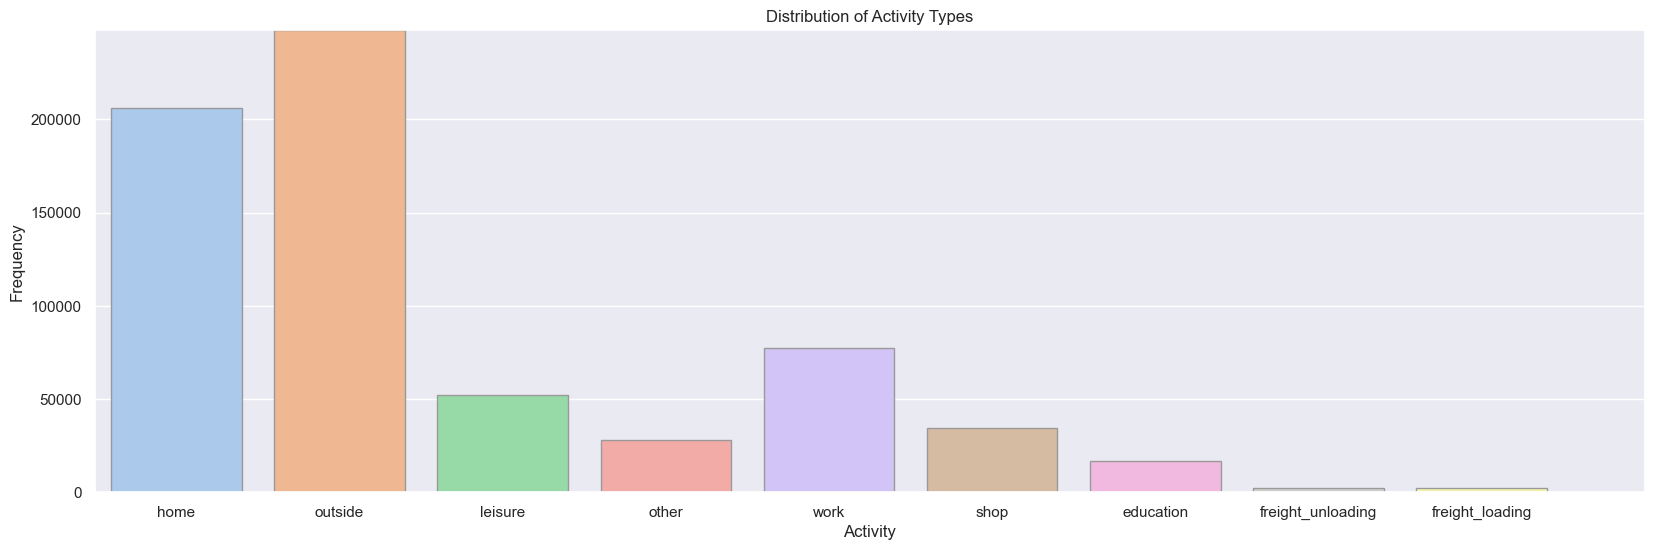

In [55]:
# Plot activity types distribution of the activities dataframe
# set sns style
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))

# Create a countplot for the 'sex' column with a circular aspect
sns.countplot(data=SynPop_activities, x="type", palette="pastel", edgecolor=".6")


# Add labels and a title to the plot
plt.xlabel("Activity")
plt.ylabel("Frequency")
plt.title("Distribution of Activity Types")

# Set the x-axis and y-axis 
max_frequency = SynPop_activities['type'].value_counts().iloc[0] + 50
plt.ylim(0, max_frequency) 
xticks_range = range(0, 10)
plt.xticks(xticks_range)
plt.yticks()

# Show the plot
plt.show()



In [56]:
# Activity types value counts
SynPop_activities['type'].value_counts().sum()

667594

### <font color="orange"> Task 04: Trip Chain Distribution

In [57]:
SynPop_activities.shape

(667594, 14)

In [16]:
SynPop_activities.head()

,id,plan_id,type,link,facility,x,y,end_time,headway_min,max_dur,start_time,city,typeBeforeCutting,short_type
0,1,1,home,270549,home4,2.679482e+06,1.237545e+06,07:50:56,30.0,NaN,NaN,NaN,NaN,H
7,8,1,outside,166874,outside_1,2.687165e+06,1.240056e+06,08:20:56,30.0,NaN,NaN,NaN,NaN,OU
8,9,1,outside,166874,outside_1,2.687165e+06,1.240056e+06,08:44:00,30.0,NaN,NaN,NaN,NaN,OU
9,10,1,outside,978218,outside_2,2.688163e+06,1.240087e+06,08:59:00,48.0,NaN,NaN,NaN,NaN,OU
16,17,1,home,270549,home4,2.679482e+06,1.237545e+06,11:05:56,60.0,NaN,08:35:56,NaN,NaN,H


In [17]:
# Create the dataframe of activity chains
activity_chains = SynPop_activities.groupby('plan_id')['short_type'].apply(lambda x: '-'.join(x)).reset_index()

In [18]:
activity_chains.head()

,plan_id,short_type
0,1,H-OU-OU-OU-H-L-O-L-L-O-L-O-L-H-L-H
1,2,H
2,3,OU-OU-OU-OU-OU-OU-OU-OU
3,4,OU-L-W-OU
4,5,OU-OU-OU-L-OU


In [19]:
# First 15 most frequent activityu chain
activity_chains['short_type'].value_counts().head(20)

short_type
OU-W-OU                    7327
OU-OU-OU-OU                6368
H-W-H                      5630
OU-OU-W-OU                 4918
H                          4425
OU-OU                      3625
H-S-H                      3417
H-OU-OU-H                  3301
OU-OU-OU-OU-OU-OU          3082
H-L-H                      2778
H-H                        1887
OU-L-OU                    1732
H-OU-OU-OU-H               1706
H-W-H-W-H                  1434
H-E-H                      1402
H-E-H-E-H                  1235
OU-OU-OU-OU-OU             1157
FL-OU                      1153
OU-FU                      1151
OU-OU-OU-OU-OU-OU-OU-OU    1139
Name: count, dtype: int64

In [20]:
activity_chains['short_type'].value_counts()

short_type
OU-W-OU                            7327
OU-OU-OU-OU                        6368
H-W-H                              5630
OU-OU-W-OU                         4918
H                                  4425
                                   ... 
H-OU-OU-OU-OU-OU-OU-S-L-OU-OU-H       1
H-H-O-OU-OU-O-H-H-H                   1
H-E-H-L-H-E-H-O-H                     1
H-O-S-L-H-O-H-OU-OU-H-O-L-L-O-H       1
FL-OU-OU-OU-OU-OU-OU-FU               1
Name: count, Length: 10242, dtype: int64

In [21]:
SynPop_persons['age'].nunique()

104

In [22]:
SynPop_persons['age'].unique()

array([ 30,   3,  48,  52,  32,  28,  40,  36,  38,  26,  31,  25,  55,
        70,  71,  69,  23,  59,  46,  41,  64,  33,  42,   5,  27,  50,
        11,  13,  35,  63,  65,  75,  21,  62,  60,  34,  44,  43,  56,
        66,  57,  29,  53,  19,  83,  51,  15,  22,  84,  58,  61,  37,
        54,  45,  67,  17,  47,  24,  49,  72,  77,  39,  87,  16,  74,
        10,  14,  18,  73,   0,   2,  80,   6,  68,  20,   9,  82,  88,
         8,  85,  81,  97,  89,  78,  92,  79,  90,  12,   1,  76,   4,
        96,  86,   7,  93,  94,  95,  91,  99, 101, 100,  98, 103, 102])

In [23]:
pipo = activity_chains['short_type'].value_counts().index

In [24]:
values_to_drop = pipo[10:]

In [25]:
most_frequent_activity_chains = activity_chains[~activity_chains['short_type'].isin(values_to_drop)]

C:\Users\muaa\AppData\Local\Temp\ipykernel_16068\611942375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=most_frequent_activity_chains, x="short_type", order=value_counts.index, palette="pastel", edgecolor=".6")


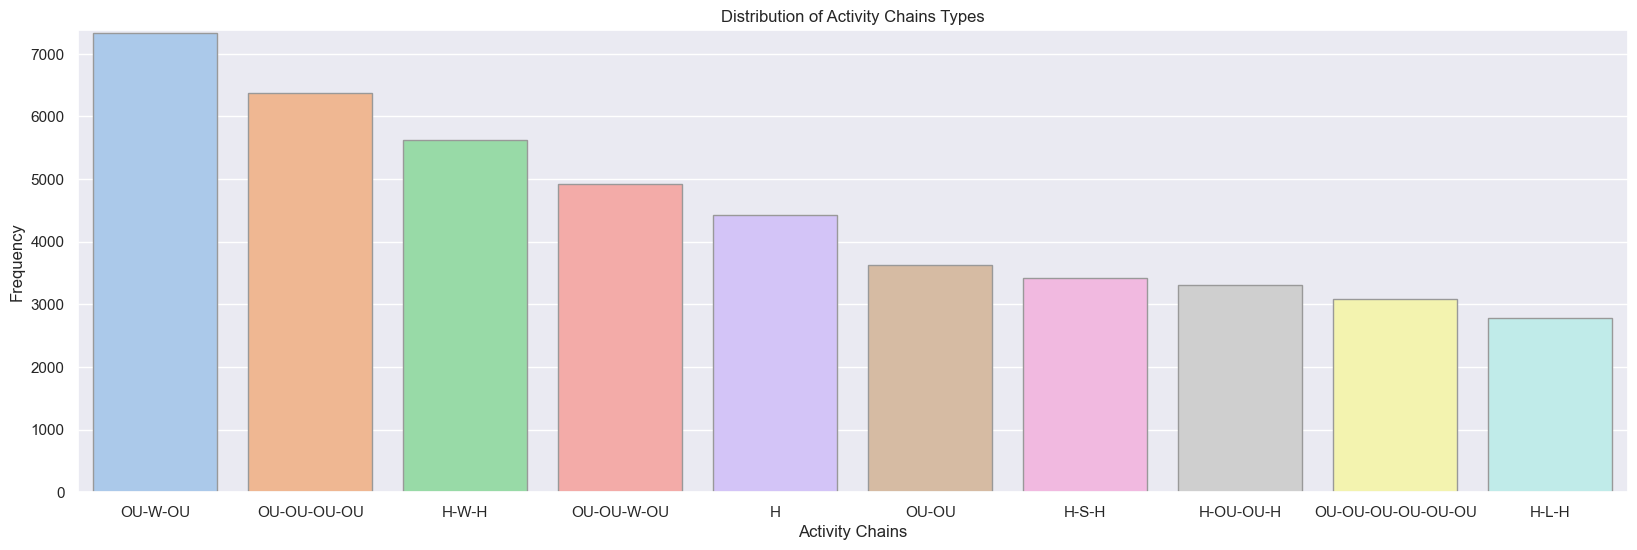

In [26]:
# Plot most frequent activity chain distribution of the most_frequent_activity_chains dataframe
# set sns style
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))

# Create a countplot for the 'sex' column with a circular aspect
value_counts = most_frequent_activity_chains['short_type'].value_counts().sort_values(ascending=False)
sns.countplot(data=most_frequent_activity_chains, x="short_type", order=value_counts.index, palette="pastel", edgecolor=".6")


# Add labels and a title to the plot
plt.xlabel("Activity Chains")
plt.ylabel("Frequency")
plt.title("Distribution of Activity Chains Types")

# Set the x-axis and y-axis 
max_frequency = most_frequent_activity_chains['short_type'].value_counts().iloc[0] + 50
plt.ylim(0, max_frequency) 
xticks_range = range(0, 10)
plt.xticks(xticks_range)
plt.yticks()

# Save the plot
# plt.savefig("pippo.png", dpi=300)

# Show the plot
plt.show()

### <font color="orange"> Task 05: O-D Distribution by Zone

In [27]:
final_activities_df = clean_activities_df[['id', 'plan_id', 'type', 'facility', 'x', 'y', 'end_time', 'start_time']]

In [28]:
final_activities_df.head()

,id,plan_id,type,facility,x,y,end_time,start_time
0,1,1,home,home4,2.679482e+06,1.237545e+06,07:50:56,NaN
7,8,1,outside,outside_1,2.687165e+06,1.240056e+06,08:20:56,NaN
8,9,1,outside,outside_1,2.687165e+06,1.240056e+06,08:44:00,NaN
9,10,1,outside,outside_2,2.688163e+06,1.240087e+06,08:59:00,NaN
16,17,1,home,home4,2.679482e+06,1.237545e+06,11:05:56,08:35:56


In [29]:
# Initialize lists to store x values
id_list = []
plan_id = []
origin_list = []
destination_list = []
x_list_o = []
y_list_o = []
x_list_d = []
y_list_d = []
start_time = []
end_time = []


# Iterate through the DataFrame
# From List of activity creates OD trips (if the subsequent activities are part of the same plan_id)
for i in range(len(final_activities_df)-1):
    current_plan_id = final_activities_df['plan_id'].iloc[i]
    next_plan_id = final_activities_df['plan_id'].iloc[i + 1]
    current_facility = final_activities_df['facility'].iloc[i]
    next_facility = final_activities_df['facility'].iloc[i + 1]
    if current_plan_id == next_plan_id and current_facility != next_facility:
        id_list.append(final_activities_df['id'].iloc[i])
        plan_id.append(final_activities_df['plan_id'].iloc[i])
        origin_list.append(final_activities_df['type'].iloc[i])
        destination_list.append(final_activities_df['type'].iloc[i + 1])
        x_list_o.append(final_activities_df['x'].iloc[i])
        y_list_o.append(final_activities_df['y'].iloc[i])
        x_list_d.append(final_activities_df['x'].iloc[i + 1])
        y_list_d.append(final_activities_df['y'].iloc[i + 1])
        start_time.append(final_activities_df['end_time'].iloc[i])
        end_time.append(final_activities_df['start_time'].iloc[i + 1])
    else:
        id_list.append(None)
        plan_id.append(None)
        origin_list.append(None)
        destination_list.append(None)
        x_list_o.append(None)
        y_list_o.append(None)
        x_list_d.append(None)
        y_list_d.append(None)
        start_time.append(None)
        end_time.append(None)

In [30]:
OD_trips = pd.DataFrame({'id': id_list, 'plan_id': plan_id, 'origin': origin_list, 'destination': destination_list,
                        'x_o': x_list_o, 'y_o': y_list_o, 'x_d': x_list_d, 'y_d': y_list_d, 'trip_start_time':start_time, 'trip_end_time': end_time})

In [ ]:
OD_trips.shape

(667593, 10)

In [ ]:
OD_trips.dropna(subset=['id'], inplace=True)

In [ ]:
OD_trips.shape

(509229, 10)

In [ ]:
# OD_trips.to_csv("od_trips.csv", index=False)

In [ ]:
OD_trips.head()

,id,plan_id,origin,destination,x_o,y_o,x_d,y_d,trip_start_time,trip_end_time
0,1.0,1.0,home,outside,2679482.0,1237545.0,2687164.597205863,1240056.4327108893,07:50:56,NaN
2,9.0,1.0,outside,outside,2687164.597205863,1240056.4327108893,2688162.5789000895,1240087.2224383662,08:44:00,NaN
3,10.0,1.0,outside,home,2688162.5789000895,1240087.2224383662,2679482.0,1237545.0,08:59:00,08:35:56
4,17.0,1.0,home,leisure,2679482.0,1237545.0,2680684.0,1236911.0,11:05:56,11:15:56
5,18.0,1.0,leisure,other,2680684.0,1236911.0,2680896.0,1238970.0,11:35:56,11:40:56
